# IBM HR Analytics – Employee Attrition & Performance
*Generated on 2025-10-07 10:32 (EDA + ML + Advanced)*


In [1]:
import os, glob, warnings
warnings.filterwarnings('ignore')
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, RocCurveDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sys, sklearn
print('Python:', sys.version.split()[0])
print('scikit-learn:', sklearn.__version__)
print('pandas:', pd.__version__)

Python: 3.12.10
scikit-learn: 1.7.2
pandas: 2.3.3


## Load dataset

In [2]:
# === Load CSV from your Windows path (simple & explicit) ===
import pandas as pd
from pathlib import Path

# 👇 Your exact file path (use r'' to avoid backslash escape issues)
csv_path = Path(r"D:\UM\IBM-HR-Analytics-Employee-Attrition-Performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")

if not csv_path.exists():
    raise FileNotFoundError(f"CSV not found at: {csv_path}\n"
                            "Double-check the path or filename and try again.")

df = pd.read_csv(csv_path)
print("Loaded:", csv_path.name, "| shape:", df.shape)
df.head(3)


Loaded: WA_Fn-UseC_-HR-Employee-Attrition.csv | shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


## Quick peek & quality

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe(include='all').T.head(20)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


In [6]:
print('Duplicates:', df.duplicated().sum())
missing = df.isna().mean().sort_values(ascending=False)
missing[missing>0] if missing.sum()>0 else print('No missing values')

Duplicates: 0
No missing values


## Ordinal label mappings

In [7]:
education_map = {1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'}
satisfaction_map = {1:'Low',2:'Medium',3:'High',4:'Very High'}
performance_map = {1:'Low',2:'Good',3:'Excellent',4:'Outstanding'}
worklife_map = {1:'Bad',2:'Good',3:'Better',4:'Best'}
df['Education_Lbl'] = df['Education'].map(education_map)
for col in ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction']:
    df[f'{col}_Lbl'] = df[col].map(satisfaction_map)
df['PerformanceRating_Lbl'] = df['PerformanceRating'].map(performance_map)
df['WorkLifeBalance_Lbl'] = df['WorkLifeBalance'].map(worklife_map)
df['AttritionFlag'] = (df['Attrition'].astype(str).str.strip().str.lower()=='yes').astype(int)
df.filter(regex='(_Lbl|Attrition|AttritionFlag)$').head()

,Attrition,Education_Lbl,EnvironmentSatisfaction_Lbl,JobInvolvement_Lbl,JobSatisfaction_Lbl,RelationshipSatisfaction_Lbl,PerformanceRating_Lbl,WorkLifeBalance_Lbl,AttritionFlag
0,Yes,College,Medium,High,Very High,Low,Excellent,Bad,1
1,No,Below College,High,Medium,Medium,Very High,Outstanding,Better,0
2,Yes,College,Very High,Medium,High,Medium,Excellent,Better,1
3,No,Master,Very High,High,High,High,Excellent,Better,0
4,No,Below College,Low,High,Medium,Very High,Excellent,Better,0


## Helper: Attrition rate by any feature

In [8]:
def attrition_rate_by(df, col):
    temp = df.groupby(col)['AttritionFlag'].agg(['mean','count']).rename(columns={'mean':'AttritionRate','count':'Count'})
    temp['AttritionRate'] = (temp['AttritionRate']*100).round(2)
    return temp.sort_values('AttritionRate', ascending=False)

## Overall attrition

In [9]:
overall_attrition = df['AttritionFlag'].mean()*100
print(f'Attrition rate: {overall_attrition:.2f}%')

Attrition rate: 16.12%


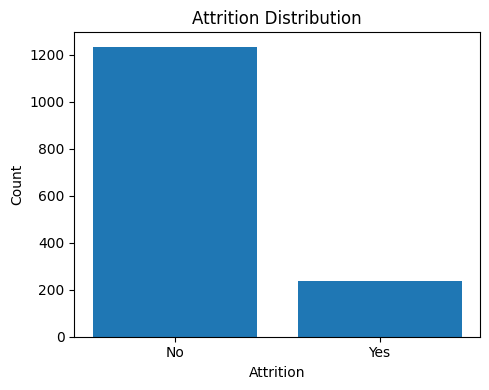

In [10]:
vals = df['Attrition'].value_counts()
plt.figure(figsize=(5,4)); plt.bar(vals.index, vals.values)
plt.title('Attrition Distribution'); plt.xlabel('Attrition'); plt.ylabel('Count'); plt.tight_layout(); plt.show()

## Tenure & demographics

In [11]:
print('Average tenure (YearsAtCompany):', round(df['YearsAtCompany'].mean(),2))

Average tenure (YearsAtCompany): 7.01


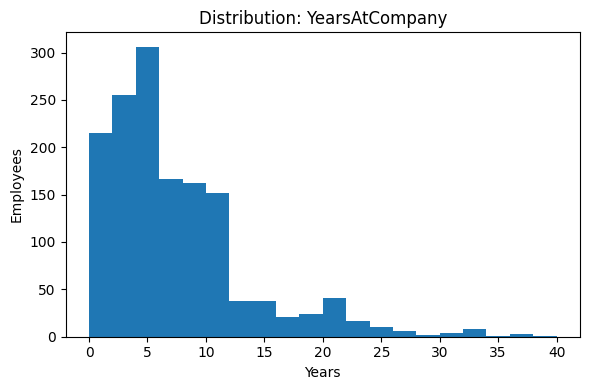

In [12]:
plt.figure(figsize=(6,4)); plt.hist(df['YearsAtCompany'], bins=20)
plt.title('Distribution: YearsAtCompany'); plt.xlabel('Years'); plt.ylabel('Employees'); plt.tight_layout(); plt.show()

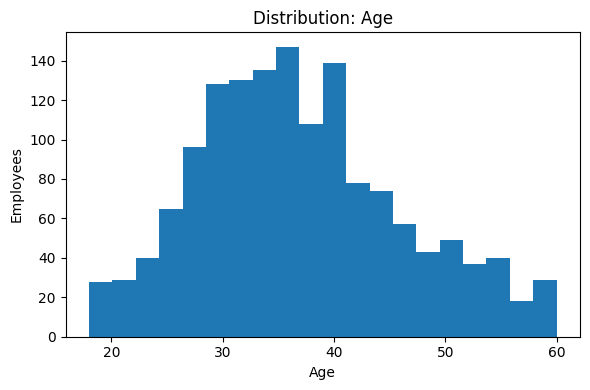

In [13]:
plt.figure(figsize=(6,4)); plt.hist(df['Age'], bins=20)
plt.title('Distribution: Age'); plt.xlabel('Age'); plt.ylabel('Employees'); plt.tight_layout(); plt.show()

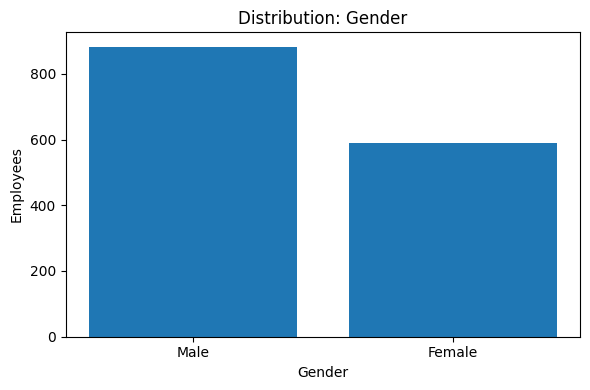

In [14]:
plt.figure(figsize=(6,4)); g = df['Gender'].value_counts(); plt.bar(g.index, g.values)
plt.title('Distribution: Gender'); plt.xlabel('Gender'); plt.ylabel('Employees'); plt.tight_layout(); plt.show()

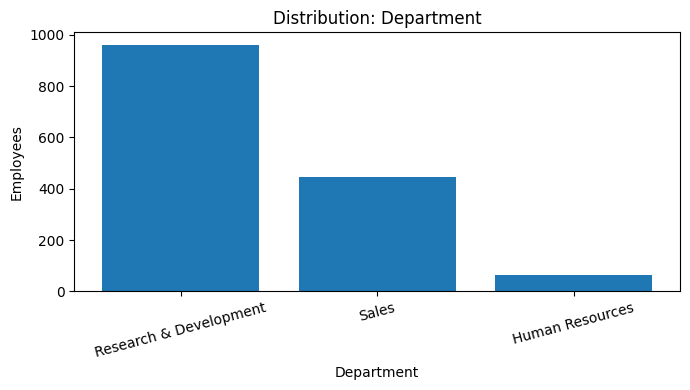

In [15]:
plt.figure(figsize=(7,4)); d = df['Department'].value_counts(); plt.bar(d.index, d.values)
plt.title('Distribution: Department'); plt.xlabel('Department'); plt.ylabel('Employees'); plt.xticks(rotation=15); plt.tight_layout(); plt.show()

## Attrition by Age

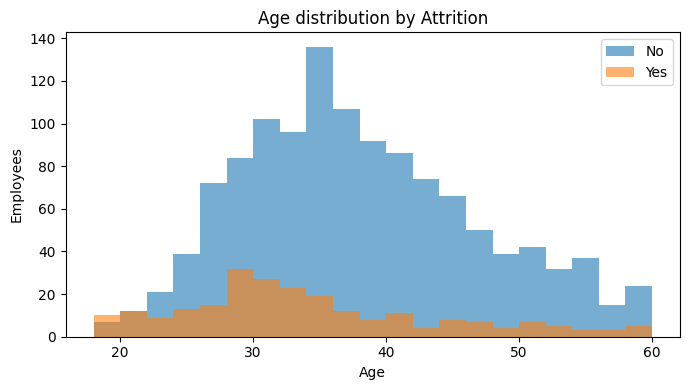

In [16]:
bins = np.arange(df['Age'].min(), df['Age'].max()+2, 2)
plt.figure(figsize=(7,4))
plt.hist(df.loc[df['AttritionFlag']==0,'Age'], bins=bins, alpha=0.6, label='No')
plt.hist(df.loc[df['AttritionFlag']==1,'Age'], bins=bins, alpha=0.6, label='Yes')
plt.title('Age distribution by Attrition'); plt.xlabel('Age'); plt.ylabel('Employees'); plt.legend(); plt.tight_layout(); plt.show()

## Attrition rate by key features


=== Gender ===


,AttritionRate,Count
Gender,,
Male,17.01,882
Female,14.80,588


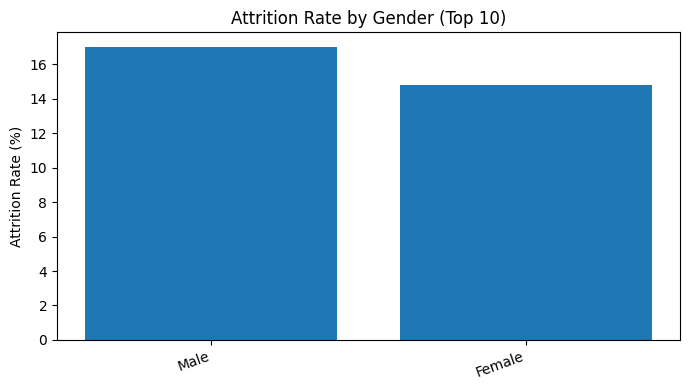


=== Department ===


,AttritionRate,Count
Department,,
Sales,20.63,446
Human Resources,19.05,63
Research & Development,13.84,961


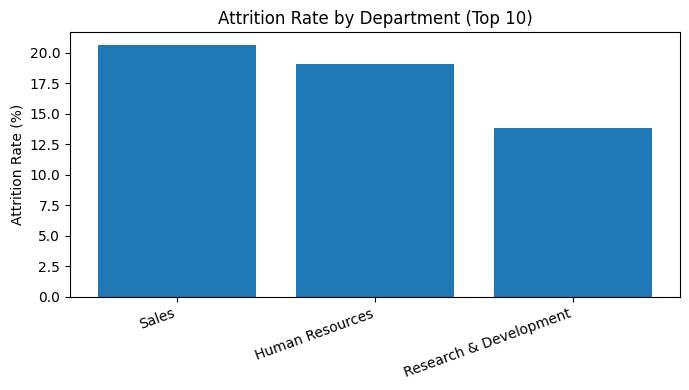


=== BusinessTravel ===


,AttritionRate,Count
BusinessTravel,,
Travel_Frequently,24.91,277
Travel_Rarely,14.96,1043
Non-Travel,8.00,150


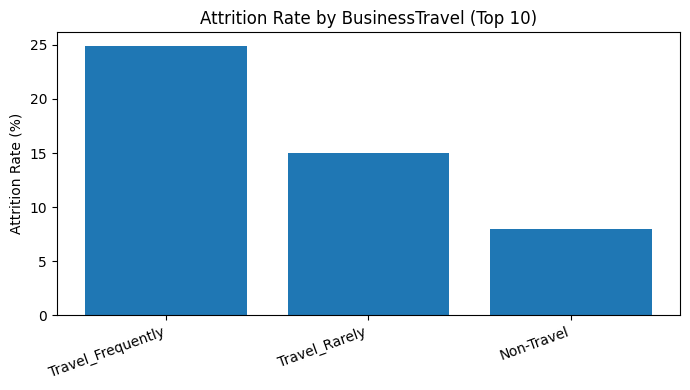


=== JobRole ===


,AttritionRate,Count
JobRole,,
Sales Representative,39.76,83
Laboratory Technician,23.94,259
Human Resources,23.08,52
Sales Executive,17.48,326
Research Scientist,16.10,292
Manufacturing Director,6.90,145
Healthcare Representative,6.87,131
Manager,4.90,102
Research Director,2.50,80


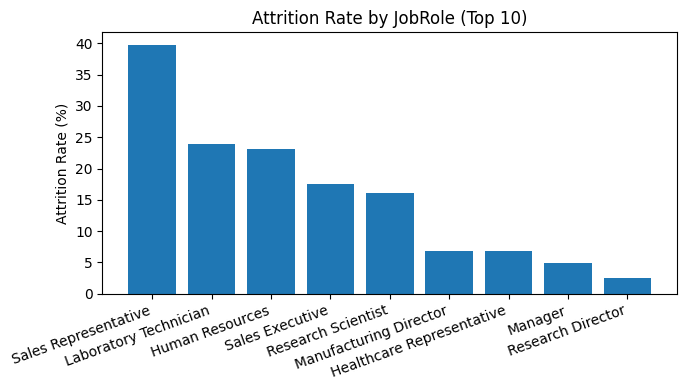


=== Education_Lbl ===


,AttritionRate,Count
Education_Lbl,,
Below College,18.24,170
Bachelor,17.31,572
College,15.60,282
Master,14.57,398
Doctor,10.42,48


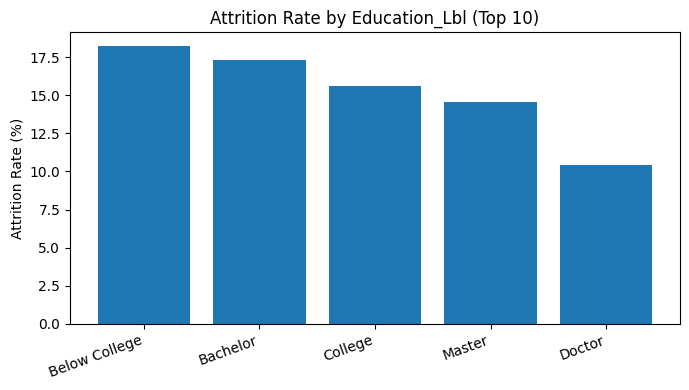


=== JobSatisfaction_Lbl ===


,AttritionRate,Count
JobSatisfaction_Lbl,,
Low,22.84,289
High,16.52,442
Medium,16.43,280
Very High,11.33,459


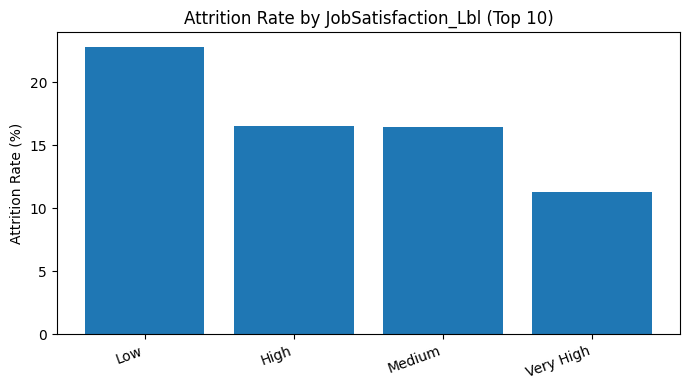


=== WorkLifeBalance_Lbl ===


,AttritionRate,Count
WorkLifeBalance_Lbl,,
Bad,31.25,80
Best,17.65,153
Good,16.86,344
Better,14.22,893


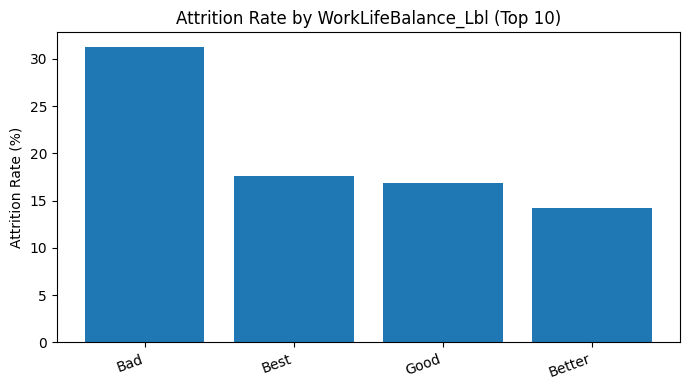


=== StockOptionLevel ===


,AttritionRate,Count
StockOptionLevel,,
0,24.41,631
3,17.65,85
1,9.40,596
2,7.59,158


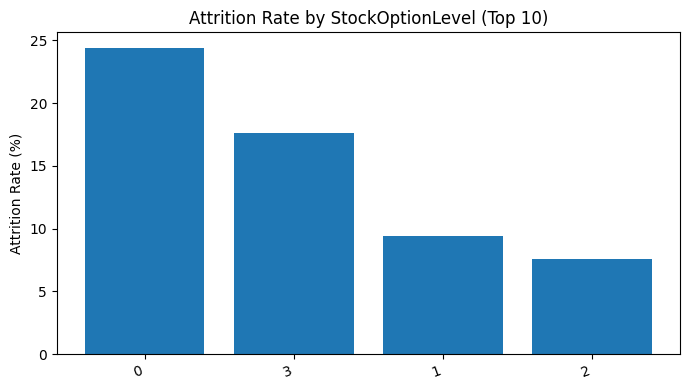

In [17]:
for col in ['Gender','Department','BusinessTravel','JobRole','Education_Lbl','JobSatisfaction_Lbl','WorkLifeBalance_Lbl','StockOptionLevel']:
    rates = attrition_rate_by(df, col)
    print(f'\n=== {col} ==='); display(rates.head(10))
    plt.figure(figsize=(7,4)); x = rates.index.astype(str)[:10]; y = rates['AttritionRate'].values[:10]
    plt.bar(x,y); plt.title(f'Attrition Rate by {col} (Top 10)'); plt.ylabel('Attrition Rate (%)')
    plt.xticks(rotation=20, ha='right'); plt.tight_layout(); plt.show()

## MonthlyIncome vs Attrition

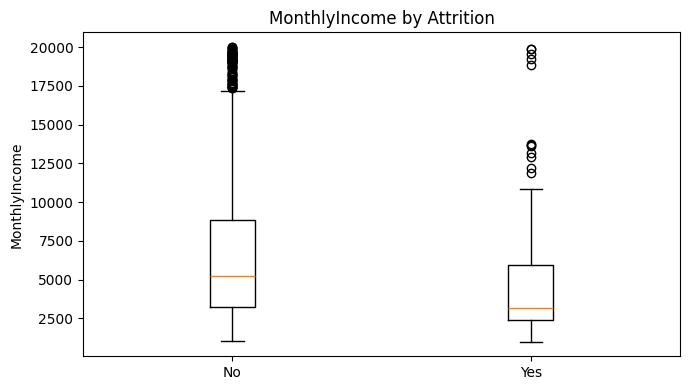

In [18]:
vals = [df.loc[df['AttritionFlag']==0,'MonthlyIncome'], df.loc[df['AttritionFlag']==1,'MonthlyIncome']]
plt.figure(figsize=(7,4)); plt.boxplot(vals, labels=['No','Yes']); plt.title('MonthlyIncome by Attrition')
plt.ylabel('MonthlyIncome'); plt.tight_layout(); plt.show()

## Correlation (numeric features)

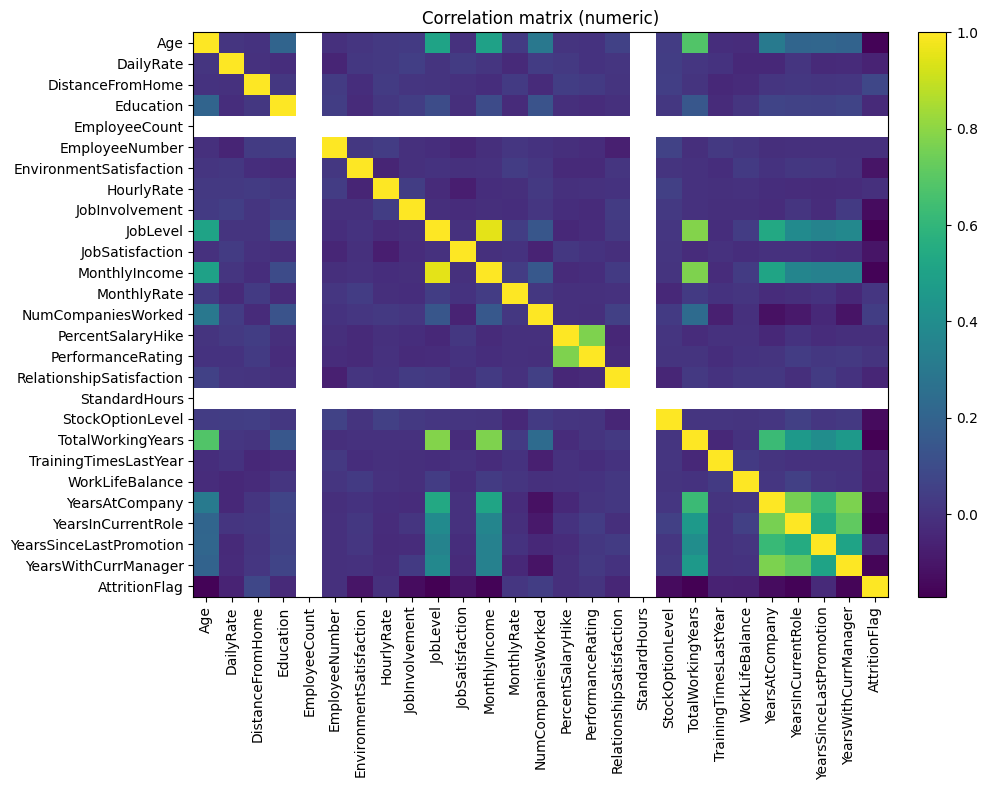

In [19]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()
plt.figure(figsize=(10,8)); im = plt.imshow(corr, aspect='auto'); plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(num_cols)), num_cols, rotation=90); plt.yticks(range(len(num_cols)), num_cols)
plt.title('Correlation matrix (numeric)'); plt.tight_layout(); plt.show()

# Baseline ML Models
## Train/Test split & preprocessing

In [20]:
target = 'AttritionFlag'
X = df.drop(columns=[target]); y = df[target]
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
cat_cols = list(sorted(set(cat_cols + [c for c in X.columns if c.endswith('_Lbl')] )))
cat_cols = [c for c in cat_cols if c in X.columns]
num_cols = [c for c in X.columns if c not in cat_cols and X[c].dtype != 'O']
redundant = [c for c in cat_cols if c.replace('_Lbl','') in num_cols]
cat_cols = [c for c in cat_cols if c not in redundant]
X = X[cat_cols + num_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train/Test:', X_train.shape, X_test.shape)

Train/Test: (1176, 35) (294, 35)


## Pipelines: Logistic Regression & Random Forest

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numeric_transformer = StandardScaler()

preprocess = ColumnTransformer([('cat', categorical_transformer, cat_cols),
                                ('num', numeric_transformer, num_cols)], remainder='drop')

log_reg = Pipeline([('prep', preprocess), ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))])
rf = Pipeline([('prep', preprocess), ('clf', RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced_subsample'))])

for name, model in [('LogisticRegression', log_reg), ('RandomForest', rf)]:
    print('\nFitting:', name)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)[:,1] if hasattr(model, 'predict_proba') else None
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
    acc = accuracy_score(y_test, pred); prec = precision_score(y_test, pred, zero_division=0)
    rec = recall_score(y_test, pred, zero_division=0); f1 = f1_score(y_test, pred, zero_division=0)
    roc = roc_auc_score(y_test, proba) if proba is not None else np.nan
    print(f'[{name}] Acc={acc:.3f}  Prec={prec:.3f}  Rec={rec:.3f}  F1={f1:.3f}  ROC-AUC={roc:.3f}')
    print('Confusion Matrix:\n', confusion_matrix(y_test, pred))


Fitting: LogisticRegression
[LogisticRegression] Acc=1.000  Prec=1.000  Rec=1.000  F1=1.000  ROC-AUC=1.000
Confusion Matrix:
 [[247   0]
 [  0  47]]

Fitting: RandomForest
[RandomForest] Acc=1.000  Prec=1.000  Rec=1.000  F1=1.000  ROC-AUC=1.000
Confusion Matrix:
 [[247   0]
 [  0  47]]


## ROC Curve (Random Forest)

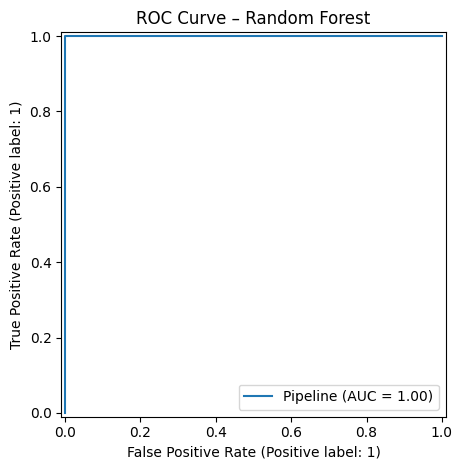

In [22]:
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title('ROC Curve – Random Forest'); plt.tight_layout(); plt.show()

## Feature Importances (Random Forest)

In [23]:
ohe = rf.named_steps['prep'].named_transformers_['cat']
feature_names = list(ohe.get_feature_names_out(cat_cols)) + num_cols
importances = rf.named_steps['clf'].feature_importances_
fi = (pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False).reset_index(drop=True))
fi.head(20)

,feature,importance
0,Attrition_No,0.393412
1,Attrition_Yes,0.351412
2,MonthlyIncome,0.018493
3,Age,0.017487
4,TotalWorkingYears,0.016954
5,YearsAtCompany,0.016181
6,YearsWithCurrManager,0.014509
7,OverTime_Yes,0.013384
8,OverTime_No,0.012004
9,StockOptionLevel,0.011729


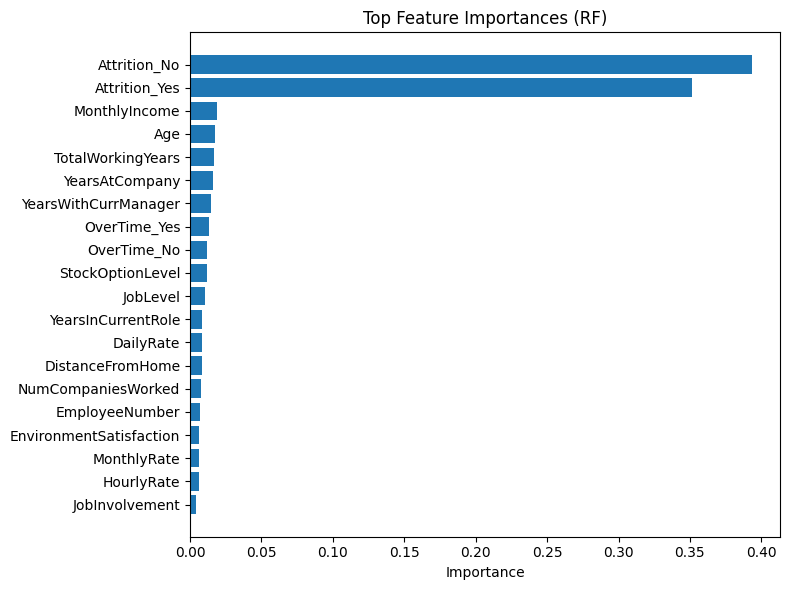

In [24]:
plt.figure(figsize=(8,6)); topn=20
plt.barh(fi['feature'][:topn][::-1], fi['importance'][:topn][::-1])
plt.title('Top Feature Importances (RF)'); plt.xlabel('Importance'); plt.tight_layout(); plt.show()

## Cross‑validation (StratifiedKFold, ROC‑AUC)

In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
print('RandomForest ROC-AUC (5-fold):', scores.round(3), '| mean=', scores.mean().round(3))

RandomForest ROC-AUC (5-fold): [1. 1. 1. 1. 1.] | mean= 1.0


## Hyperparameter Tuning – Random Forest (RandomizedSearchCV)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best ROC-AUC (CV): 1.0
Best Params: {'clf__bootstrap': True, 'clf__max_depth': 17, 'clf__max_features': None, 'clf__min_samples_leaf': 8, 'clf__min_samples_split': 8, 'clf__n_estimators': 321}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00        47

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



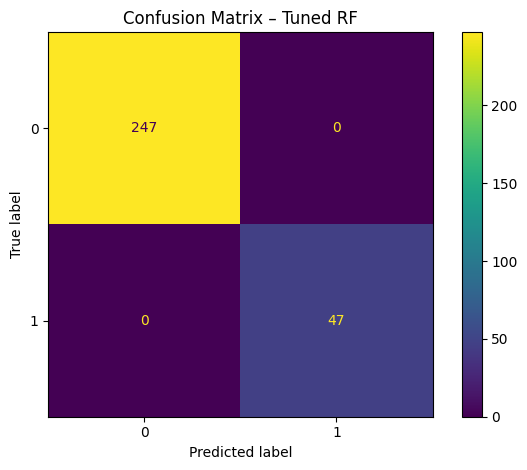

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

param_dist = {
    'clf__n_estimators': randint(200, 600),
    'clf__max_depth': randint(3, 20),
    'clf__min_samples_split': randint(2, 20),
    'clf__min_samples_leaf': randint(1, 10),
    'clf__max_features': ['sqrt', 'log2', None],
    'clf__bootstrap': [True, False],
}
rf_search = Pipeline([('prep', preprocess),
                      ('clf', RandomForestClassifier(random_state=42, class_weight='balanced_subsample'))])
search = RandomizedSearchCV(rf_search, param_distributions=param_dist, n_iter=25, cv=5,
                            scoring='roc_auc', random_state=42, verbose=1)
search.fit(X_train, y_train)
best_rf = search.best_estimator_
print('Best ROC-AUC (CV):', search.best_score_)
print('Best Params:', search.best_params_)
pred = best_rf.predict(X_test)
proba = best_rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, pred))
ConfusionMatrixDisplay.from_predictions(y_test, pred); plt.title('Confusion Matrix – Tuned RF'); plt.tight_layout(); plt.show()

## Threshold Tuning (maximize F1)

In [27]:
import numpy as np
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report
proba = best_rf.predict_proba(X_test)[:,1]
prec, rec, th = precision_recall_curve(y_test, proba)
f1s = 2*prec*rec/(prec+rec + 1e-9)
ix = np.nanargmax(f1s)
best_thr = th[ix]
print(f'Best threshold≈ {best_thr:.3f}  F1={f1s[ix]:.3f}  P={prec[ix]:.3f}  R={rec[ix]:.3f}')
pred_thr = (proba >= best_thr).astype(int)
print('Confusion matrix@best-threshold:\n', confusion_matrix(y_test, pred_thr))
print(classification_report(y_test, pred_thr))

Best threshold≈ 1.000  F1=1.000  P=1.000  R=1.000
Confusion matrix@best-threshold:
 [[247   0]
 [  0  47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00        47

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



## Probability Calibration (Isotonic)

In [28]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_auc_score
cal_rf = CalibratedClassifierCV(best_rf, method='isotonic', cv=5)
cal_rf.fit(X_train, y_train)
proba_cal = cal_rf.predict_proba(X_test)[:,1]
print('ROC-AUC (calibrated):', roc_auc_score(y_test, proba_cal))

ROC-AUC (calibrated): 1.0


## Save Trained Pipeline + Inference Helper

In [30]:
import os, joblib

# Save inside your project folder under "artifacts"
os.makedirs("artifacts", exist_ok=True)
artifact_path = "artifacts/hr_attrition_best_rf.joblib"

# Save model
joblib.dump(best_rf, artifact_path)
print("Saved model to:", artifact_path)

# Load + predict helpers
def load_model(path=artifact_path):
    return joblib.load(path)

def predict_attrition(df_like, model_path=artifact_path, threshold=0.5):
    model = load_model(model_path)
    proba = model.predict_proba(df_like)[:, 1]
    preds = (proba >= threshold).astype(int)
    return preds, proba


Saved model to: artifacts/hr_attrition_best_rf.joblib
